In [490]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [507]:
# Basic Example using a json file:
from distgen.reader import Reader
# The distgen reader assumes the input file is json formatted.  If not it, it defaults to parsing the file as an ascii txt file.
filename = "rad.gaussian.in.json"
par = Reader(filename,verbose=1)
p = par.read()

Reading file 'rad.gaussian.in.json'...done. Time Ellapsed: 1.17 millisecond


In [492]:
dict(p)

{'beam': {'start_type': 'cathode',
  'rand_type': 'hammersley',
  'particle_count': 200000,
  'params': {'total_charge': {'value': 10, 'units': 'pC'},
   'MTE': {'value': 150, 'units': 'meV'}}},
 'r_dist': {'type': 'radial_gaussian',
  'params': {'sigma_xy': {'value': 2, 'units': 'mm'}}},
 't_dist': {'type': 'uniform',
  'params': {'min_t': {'value': -2, 'units': 'ps'},
   'max_t': {'value': 2, 'units': 'ps'}}},
 'output': {'type': 'gpt', 'file': 'rad.gaussian.out.txt'}}

In [514]:
# Generator is the main object that creates a beam distribution
from distgen.generator import Generator
gen = Generator(verbose=1) # Create a generator object
gen.parse_input(p)         # Parse input structure
beam = gen.beam() # Generate distribution, return the beam and the desired outputfile
beam.print_stats()

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 10.000 pC.
   Number of macroparticles: 200000.
   r distribution: radial Gaussian
      sigma_xy = 2.000 mm
      Assuming cylindrical symmetry...
   t distribution: uniform
      min_t = -2.000 ps, max_t = 2.000 ps
   px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 276.857 eV/c
   Cathode start: fixing pz momenta to forward hemisphere
      avg_pz -> 220.907 eV/c, sigma_pz -> 166.884 eV/c
...done. Time Ellapsed: 336.98 millisecond.


Beam stats:
   avg_x = 0.000 m, sigma_x = 0.002 m
   avg_y = -0.000 m, sigma_y = 0.002 m
   avg_z = 0.000 m, sigma_z = 0.000 m
   avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   avg_pz = 220.907 e

In [496]:
# The beam object allows access to the beam coordinates via [...]
print("X coordinates:",beam["x"])

X coordinates: [0.00071868 0.00257194 0.00173156 ... 0.00284179 0.00197399 0.00416432] meter


In [495]:
# The bunch charge is given by beam.q
print("Bunch charge:",beam.q)

Bunch charge: 10 picocoulomb


In [485]:
# Currently, the code assumes one particle species (default: electrons) per beam object
print("Beam species:",beam.species)

Beam species: electron


In [486]:
# The bunch contains an array of particle weights (currently uniform) for use with averaging:
print("Weights:",beam["w"])
print("Normalization sum(weights): ",np.sum(w))

Weights: [5.e-06 5.e-06 5.e-06 ... 5.e-06 5.e-06 5.e-06] dimensionless
Normalization sum(weights):  1.0 dimensionless


In [515]:
# The beam class uses these weights in its own avg and std functions:
print("Avgerage of X:",beam.avg("x"))
print("Standard Deviation of X:",beam.std("x",desired_units="mm"))

Avgerage of X: 2.0328790734103208e-19 meter
Standard Deviation of X: 2.0000000000000004 millimeter


In [506]:
# Distgen supports writer functions for various output formats/codes (GPT,ASTRA)
from distgen.writers import *
# Typically the user can just call the general write function and specify the desired format:
writer("gpt",beam,"rad.gaussian.gpt.out.txt",verbose=1,params=p)
writer("astra",beam,"rad.gaussian.astra.out.txt",verbose=1,params=p)

Printing 200000 particles to 'rad.gaussian.gpt.out.txt': done. Time ellapsed: 1.59 second.
Printing 200000 particles to 'rad.gaussian.astra.out.txt': done. Time ellapsed: 1.84 second.


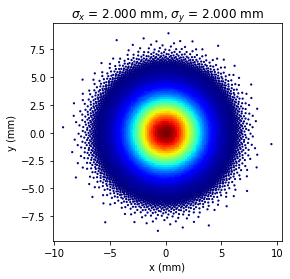

In [402]:
# The distgen module has some basic plotting routines
from distgen.plot import *

units = {"x":"mm","y":"mm","px":"keV/c","py":"keV/c","t":"ps","q":"pC"}

# plot_2d allows for plotting a 2D subspace of the beam coordinates:

fig=plt.figure(1)
# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

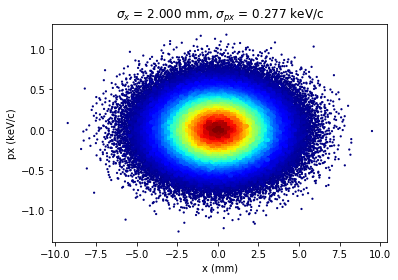

In [403]:
# X-Px Plot
fig.add_subplot(1,3,2)
plot_2d(beam,1,"x",units["x"],"px",units["px"],'scatter_hist2d',nbins=100);

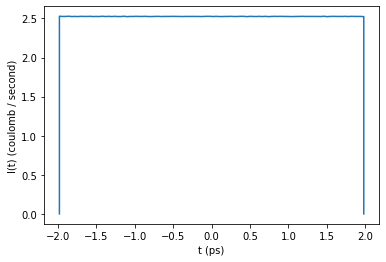

In [404]:
# Laser Current Profile
plot_current_profile(beam,1,units);

In [408]:
#********************************************************************************
# User driver function
#********************************************************************************
from distgen.drivers import run_distgen

# All of the above commands can be executed together in one call using the driver
# function run_distgen:

beam = run_distgen(inputs=p,verbose=1)

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 10.000 pC.
   Number of macroparticles: 200000.
   r distribution: radial Gaussian
      sigma_xy = 2.000 mm
      Assuming cylindrical symmetry...
   t distribution: uniform
      min_t = -2.000 ps, max_t = 2.000 ps
   px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 276.857 eV/c
   Cathode start: fixing pz momenta to forward hemisphere
      avg_pz -> 220.907 eV/c, sigma_pz -> 166.884 eV/c
...done. Time Ellapsed: 336.67 millisecond.

Printing 200000 particles to 'rad.gaussian.out.txt': done. Time ellapsed: 1.74 second.

Beam stats:
   avg_x = 0.000 m, sigma_x = 0.002 m
   avg_y = -0.000 m, sigma_y = 0.002 m
   avg_z = 0.000 m, sigma_z = 0.000 m
   avg_px = 0.000 GB, sigma_px

In [406]:
# Note, the keyword arguement 'inputs' can also take the file name:
beam = run_distgen(inputs="rad.gaussian.in.json",verbose=1)

Reading file 'rad.gaussian.in.json'...done. Time Ellapsed: 856.16 microsecond
Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 10.000 pC.
   Number of macroparticles: 200000.
   r distribution: radial Gaussian
      sigma_xy = 2.000 mm
      Assuming cylindrical symmetry...
   t distribution: uniform
      min_t = -2.000 ps, max_t = 2.000 ps
   px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 276.857 eV/c
   Cathode start: fixing pz momenta to forward hemisphere
      avg_pz -> 220.907 eV/c, sigma_pz -> 166.884 eV/c
...done. Time Ellapsed: 341.62 millisecond.

Printing 200000 particles to 'rad.gaussian.out.txt': done. Time ellapsed: 1.71 second.

Beam stats:
   avg_x = 0.000 m, sigma_x = 0.002 m
   avg_y = -0.000 m, sigma_y 

In [409]:
# It is also possible to run distgen as an executible script using /bin/DistGen.py
import subprocess
output=subprocess.check_output(['python','../bin/DistGen.py','-f','rad.gaussian.in.json','-v','2'])
output=str(output.decode('utf-8')).split("\n")
for line in output:
    print(line)


Reading file 'rad.gaussian.in.json'...done. Time Ellapsed: 182.15 microsecond
Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 10.000 pC.
   Number of macroparticles: 200000.
   r distribution: radial Gaussian
      sigma_xy = 2.000 mm
      Assuming cylindrical symmetry...
   t distribution: uniform
      min_t = -2.000 ps, max_t = 2.000 ps
   px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 276.857 eV/c
   Cathode start: fixing pz momenta to forward hemisphere
      avg_pz -> 220.907 eV/c, sigma_pz -> 166.884 eV/c
...done. Time Ellapsed: 315.23 millisecond.

Printing 200000 particles to 'rad.gaussian.out.txt': done. Time ellapsed: 1.53 second.

Beam stats:
   avg_x = 0.000 m, sigma_x = 0.002 m
   avg_y = -0.000 m, sigma_y 

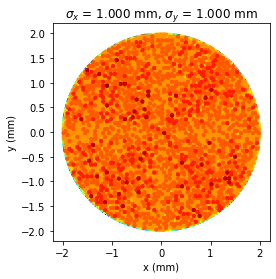

In [411]:
#********************************************************************************
# Scaling/Rotating/Shifting Coordinates:
#********************************************************************************
 
# The distgen module allows the user scale, rotate, and shift beam coordinates by 
# adding variables to beam parameters dictionary. The order of operations is:
# 1.  Removing the average value of each coordinate 
# 2.  Scaling desired coordinates
# 3.  Rotating coordinates (XY only currently)
# 4.  Shift any desired coordinates

# The following example builds on these steps

# First, load the radially uniform example:
par.reset("rad.uniform.in.json",verbose=0)
p = par.read()

# The example makes a doughnut, let's make it a solid circle by setting min_r = 0
p["r_dist"]["params"]["min_r"]["value"]=0

gen.verbose=0
gen.parse_input(p)
beam = gen.beam()

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

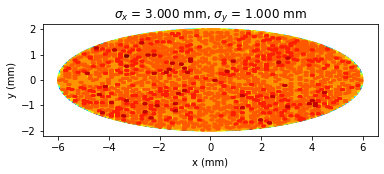

In [412]:
# Scale the x coordinate:
p["beam"]["params"]["sigma_x"]={"value":3,"units":"mm"}

gen.parse_input(p)
beam = gen.beam()

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

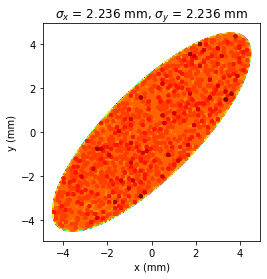

In [413]:
# Perform an XY rotation:

# The simplest example is to rotate the x-y coordinates by an angle
p["beam"]["params"]["rotate_xy"]={"value":45,"units":"deg"}

# NOTE THIS DOES NOT EFFECT THE MOMENTA!

gen.parse_input(p)
beam = gen.beam()

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

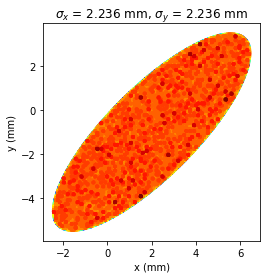

In [414]:
# Finally, shift the X and Y coordinates:
p["beam"]["params"]["avg_x"]={"value":2,"units":"mm"}
p["beam"]["params"]["avg_y"]={"value":-1,"units":"mm"}

gen.parse_input(p)
beam = gen.beam()

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");